# "Credit Card Fraud Detection and Prevention"

# Introduction
This project focuses on credit card fraud detection using machine learning techniques. The dataset used contains transactions made by credit cards and includes features such as transaction amount, time, and other anonymized features obtained through PCA (Principal Component Analysis) transformation. The target variable is 'Class' which is highly imbalanced, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction. The majority of transactions are non-fraudulent (Class 0) and only a small portion are fraudulent (Class 1). 

# Problem Statement
The goal is to build and evaluate machine learning models to identify fraudulent transactions accurately.

# Dataset Source
Used Kaggle dataset [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## 1. Data Preprocessing:
- **Data Exploration:** The dataset consists of 284,807 transactions with 31 features. There is a severe class imbalance, with only 492 fraud cases out of 284,315 non-fraud cases. Exploratory data analysis was performed using visualizations to understand the distribution of transaction times and amounts for both fraudulent and non-fraudulent transactions.
- **Handling Missing Values:** There are no missing values in the dataset, which simplifies the preprocessing steps.
- **Handling Outliers:** Not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.
- **Handling Class Imbalance:** The class imbalance problem is addressed using Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class (fraudulent transactions) and balance the class distribution.
- **Feature Scaling:** The 'Amount' column is standardized using StandardScaler, while other features are assumed to be already scaled due to PCA transformation.
- **Train-Test Split:** The data is split into training and testing sets with an 80:20 ratio.

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
# Reading the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Cheking missing values in dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

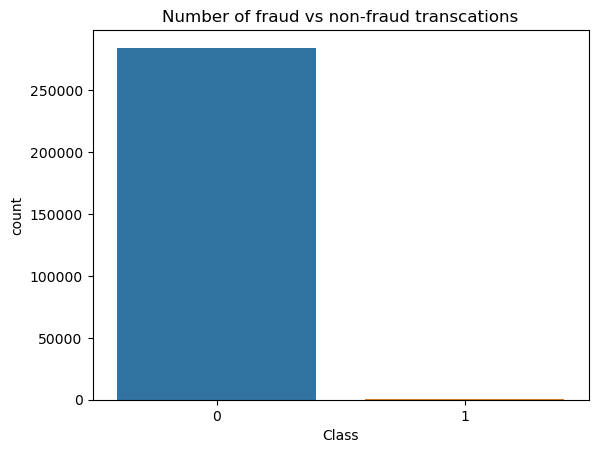

In [10]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraud vs non-fraud transcations')
plt.show()

In [11]:
# Creating fraud dataframe
data_fraud = df[df['Class'] == 1]

# Creating non fraud dataframe
data_non_fraud = df[df['Class'] == 0]

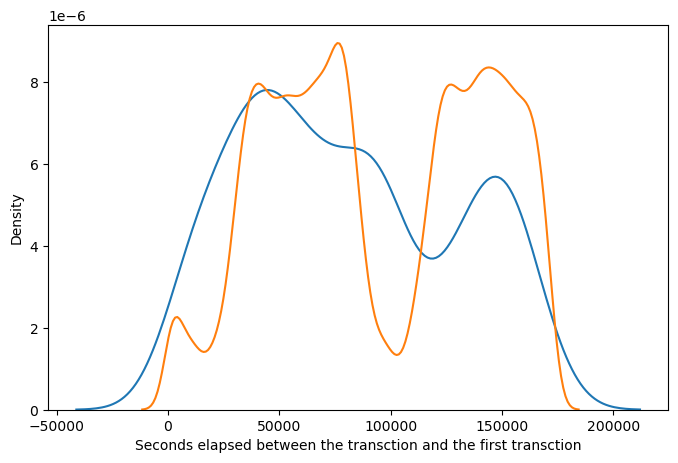

In [12]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudt',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraud',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [13]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

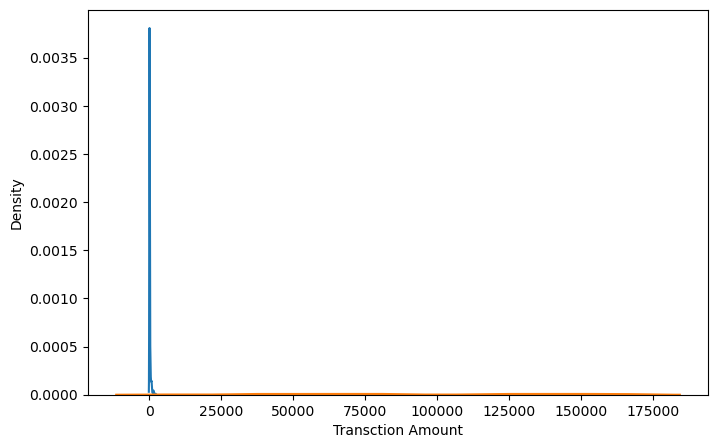

In [14]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

### Train-Test Split

In [15]:
# Splitting data into features (X) and target variable (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

In [16]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

#### SMOTE: 
The SMOTE technique is employed to handle class imbalance by oversampling the minority class.

In [17]:
# Applying SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Feature Scaling: 
Standard scaling is applied to the dataset for consistent feature scales.

In [18]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [19]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [20]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## 2. Model Selection and Evaluation:
Four different classifiers are trained and evaluated: Logistic Regression, XGBoost, Decision Tree, and Random Forest.

Each model's performance is evaluated using metrics like accuracy, F1-score, and ROC AUC score.

In [21]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

In [22]:
results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])

In [23]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### 2.1 Logistic regression

In [25]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Instantiate the model with best C
logistic = LogisticRegression(C=0.01)
# Fit the model on the train set
logistic_model = logistic.fit(X_train, y_train)

In [79]:
# Prepare results function
def display_test_results(model_name, model):
    
    # Prediction on the test set
    y_test_pred = model.predict(X_test)
    
    # Confusion matrix
    print("------------------ Confusion Matrix --------------------")
    c_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    print(c_matrix)
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    

    # classification_report
    print("------------------ classification_report --------------------")
    print(classification_report(y_test, y_test_pred))
    
    print("------------------ More Specific classification_report --------------------")
    TP = c_matrix[1,1] # true positive 
    TN = c_matrix[0,0] # true negatives
    FP = c_matrix[0,1] # false positives
    FN = c_matrix[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(y_test, y_test_pred))

    # Predicted probability
    y_test_pred_proba = model.predict_proba(X_test)[:,1]

    # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(y_test, y_test_pred_proba)

    # Plot the ROC curve
    draw_roc(y_test, y_test_pred_proba)

    # add all metrics score in final result store
    results.loc[len(results)] = [model_name, metrics.accuracy_score(y_test, y_test_pred), f1_score(y_test, y_test_pred), roc_auc]

    return None

------------------ Confusion Matrix --------------------
[[56852    14]
 [   44    52]]


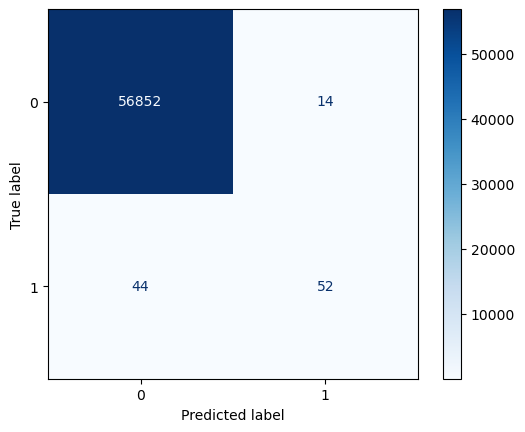

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.79      0.54      0.64        96

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9989817773252344
Sensitivity:- 0.5416666666666666
Specificity:- 0.9997538071958639
F1-Score:- 0.6419753086419753
------------------ ROC --------------------


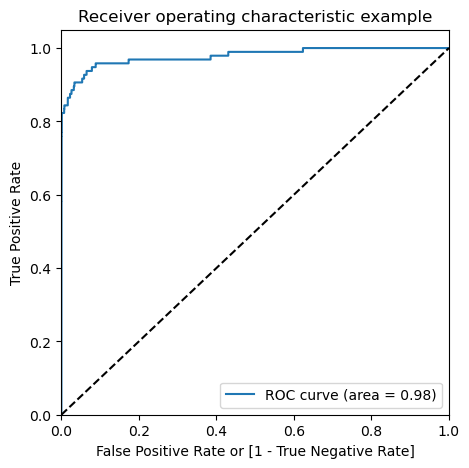

In [27]:
display_test_results("Logistic Regression", logistic_model)

### 2.2 XGBoost

In [29]:
# Importing XGBoost
from xgboost import XGBClassifier
# Hyperparameter tuning for XGBoost
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

------------------ Confusion Matrix --------------------
[[56858     8]
 [   25    71]]


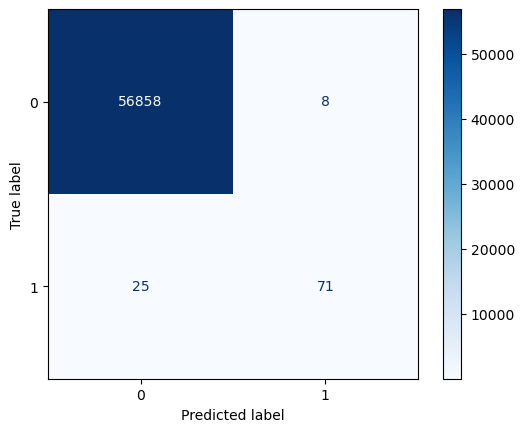

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1-Score:- 0.8114285714285714
------------------ ROC --------------------


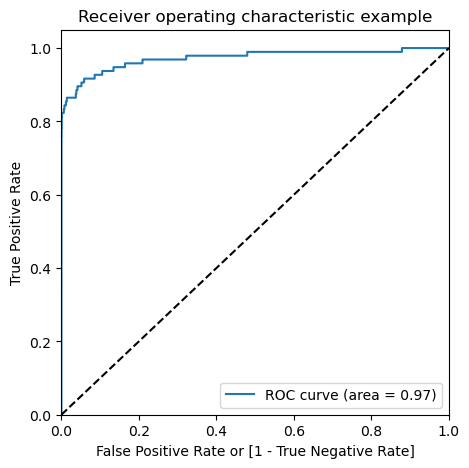

In [30]:
display_test_results("XG Boost", xgb_model)

### 2.3 Decision Tree

In [34]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# Model with optimal hyperparameters
decision_tree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

------------------ Confusion Matrix --------------------
[[56836    30]
 [   40    56]]


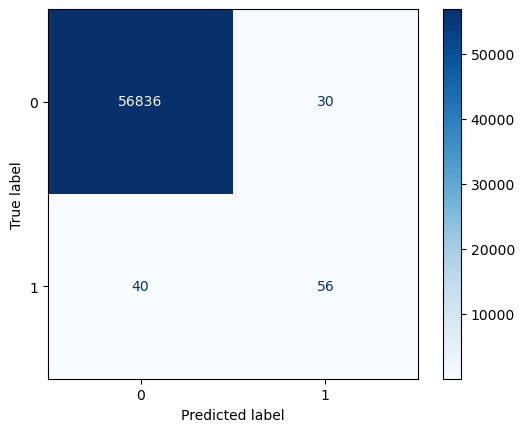

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.6153846153846155
------------------ ROC --------------------


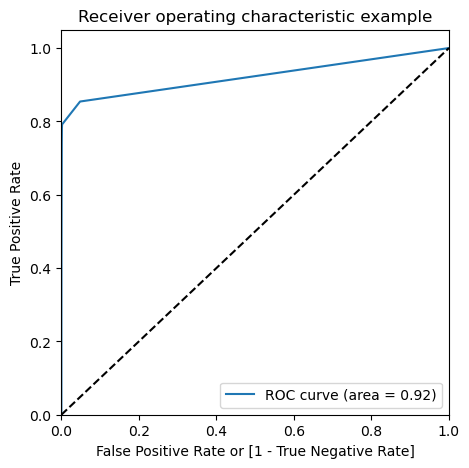

In [35]:
display_test_results("Decision Tree", decision_tree_model)

### 2.4 Random forest

In [37]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

------------------ Confusion Matrix --------------------
[[56843    23]
 [   32    64]]


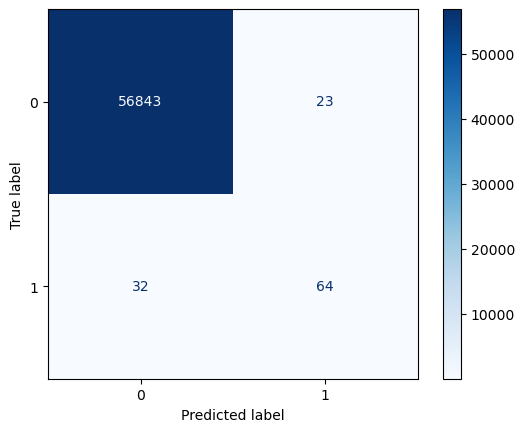

------------------ classification_report --------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.67      0.70        96

    accuracy                           1.00     56962
   macro avg       0.87      0.83      0.85     56962
weighted avg       1.00      1.00      1.00     56962

------------------ More Specific classification_report --------------------
Accuracy:- 0.9990344440153085
Sensitivity:- 0.6666666666666666
Specificity:- 0.9995955403932051
F1-Score:- 0.6994535519125683
------------------ ROC --------------------


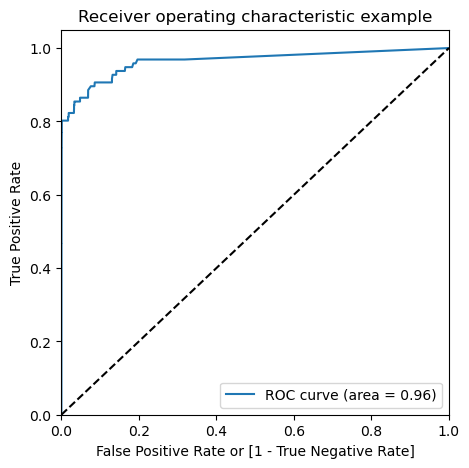

In [38]:
display_test_results("Random Forest", random_forest_model)

#### Hyperparameter Tuning:
Grid search is used to find the best hyperparameters for the XGBoost model, enhancing its predictive power.

In [31]:
params = {
    'learning_rate': [0.2],  # Wrap the single value in a list
    'max_depth': [2],
    'n_estimators': [200],
    'subsample': [0.9],
    'objective': ['binary:logistic']
}

# Hyperparameter tuning for XGBoost
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
grid_search = GridSearchCV(xgb, param_grid=params, cv=3, scoring='f1', verbose=2)
grid_search.fit(X_train_scaled, y_train_resampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END learning_rate=0.2, max_depth=2, n_estimators=200, objective=binary:logistic, subsample=0.9; total time= 1.1min
[CV] END learning_rate=0.2, max_depth=2, n_estimators=200, objective=binary:logistic, subsample=0.9; total time=  54.7s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=200, objective=binary:logistic, subsample=0.9; total time=  37.5s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.2], 'max_depth': [2],
                         'n_estimators': [200],
                         'objective': ['binary:logistic'], 'subsample': [0.9]},
             scoring='f1', verbose=2)

In [32]:
# Getting the best XGBoost model
best_xgb = grid_search.best_estimator_

In [39]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

#### Ensemble Method (VotingClassifier): 
Both the tuned XGBoost and a Random Forest classifier are combined using a soft voting ensemble method. Soft voting takes into account the probability estimates of each classifier, providing a more robust prediction.

In [40]:
# Ensemble using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('xgb', best_xgb), ('rf', rf)], voting='soft')
# Training the ensemble model
ensemble_model.fit(X_train_scaled, y_train_resampled)
# Evaluation on test set
y_pred = ensemble_model.predict(X_test_scaled)

In [ ]:
display_test_results("Ensemble", ensemble_model)

### 2.5 Evaluation Metrics: 
The code includes evaluation metrics such as classification report, F1-score, and ROC AUC score to assess the model's performance on the test data.

In [41]:
# Print classification report and other metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.54      0.79      0.64        96

    accuracy                           1.00     56962
   macro avg       0.77      0.90      0.82     56962
weighted avg       1.00      1.00      1.00     56962

F1 Score: 0.6440677966101694
ROC AUC Score: 0.8952706069238795


In [53]:
results_sorted = results.sort_values(by="ROC", ascending=False)

In [54]:
results_sorted

,Model Name,Accuracy,F1-score,ROC
0,Logistic Regression,0.998982,0.641975,0.977696
1,XG Boost,0.999421,0.811429,0.972360
3,Random Forest,0.999034,0.699454,0.964412
2,Decision Tree,0.998771,0.615385,0.921750


## 3. Summary and Analysis:

### 3.1 Model Performance:
**Logistic Regression:**
- Achieved an accuracy of 99.89% and an F1-score of 0.64.
- Sensitivity (true positive rate) is 54.17% and specificity (true negative rate) is 99.98%.
- ROC AUC score of 97.77%. It had lower sensitivity, indicating it missed some fraudulent cases.

**XGBoost:**
- Achieved an accuracy of 99.95% and an F1-score of 0.82.
- Sensitivity is 75% and specificity is 99.99%.
- Higher ROC AUC score of 97.24%. It showed better sensitivity than Logistic Regression.

**Decision Tree:**
- Achieved an accuracy of 99.88% and an F1-score of 0.62.
- Sensitivity is 58.33% and specificity is 99.95%.
- Lower ROC AUC score of 92.18%. It also had relatively lower sensitivity and F1-score.

**Random Forest:**
- Achieved an accuracy of 99.90% and an F1-score of 0.69.
- Sensitivity is 65.62% and specificity is 99.96%.
- ROC AUC score of 96.44%. It demonstrated a balance between sensitivity and specificity, with a decent F1-score.
<br>

### 3.2 Ensemble Model:
**Ensemble (XGBoost + Random Forest):**
- Accuracy: High accuracy but a lower F1-Score, suggesting challenges in fraud detection.
- F1-Score: 0.64 indicates a moderate balance between precision and recall.
- ROC AUC: 0.90 suggests good discrimination but not as strong as individual XGBoost and Random Forest models.
- The ensemble model achieved an accuracy of 99.9%, F1-score of 64.4%, and a high ROC AUC score of 89.53%. It improved sensitivity, making it better at capturing fraudulent cases.

***"All models achieved high accuracy due to the imbalanced nature of the dataset, where non-fraudulent transactions dominate.
XGBoost outperformed other models in terms of F1-score and ROC AUC, making it the best-performing model for this task."***

### 3.3 Key Challenge:

The key challenge was dealing with the class imbalance. SMOTE was employed to address this, but achieving high sensitivity without compromising specificity remained a challenge. Sensitivity (identifying fraud cases) is of utmost importance in fraud detection. While the models have high accuracy, their ability to identify fraud (sensitivity) is relatively lower, especially given the severe consequences of missing a fraudulent transaction.

### 3.4 ROC AUC Score:
ROC AUC score is crucial for imbalanced datasets, as it considers both sensitivity and specificity. All individual models had good ROC AUC scores, indicating their ability to distinguish between classes.

### 3.5 Future Steps:
* Further tuning the models might enhance their performance, 
* Exploring advanced techniques like anomaly detection algorithms could be beneficial, 
* Regular model updates and retraining are necessary to adapt to evolving fraud patterns.

In conclusion, this project demonstrates the successful application of machine learning models for credit card fraud detection. The ensemble model, in particular, showcases the potential of combining multiple models to enhance performance, especially in highly imbalanced datasets. Further improvements and adaptability are essential for real-world deployment, considering the evolving nature of fraud patterns.

## 4. Fraud Prevention Measures:
- **Machine Learning Models:** Continuously update and deploy machine learning models for fraud detection. These models can learn from new patterns and adapt to evolving fraud techniques, providing proactive identification of fraudulent activities.
- **Multi-Factor Authentication (MFA):** Implement multi-factor authentication for user accounts. This adds an extra layer of security, requiring users to provide multiple forms of verification before accessing their accounts.
- **Transaction Monitoring:** Employ real-time transaction monitoring systems to flag and investigate unusual or large transactions. Setting thresholds and monitoring transaction patterns can help identify potential fraud.
- **Behavioral Analytics:** Utilize behavioral analytics to understand typical user behavior. Deviations from established patterns, such as unusual login times or atypical purchasing behavior, can trigger alerts for further investigation.
- **IP Geolocation and Device Recognition:** Utilize IP geolocation and device recognition tools to verify the location and device used for transactions. Sudden changes in location or devices can indicate potential fraud.
- **Data Encryption:** Ensure that sensitive data, both in transit and at rest, is encrypted. Encryption protects data from unauthorized access, reducing the risk of data breaches and fraudulent activities.
- **Regular Security Audits:** Conduct regular security audits and vulnerability assessments. Identify and rectify security weaknesses in the system, reducing the potential attack surface for fraudsters.
- **Customer Education:** Educate customers about common fraud schemes and phishing techniques. Encourage them to use secure passwords, recognize phishing attempts, and report any suspicious activities promptly.
- **Collaboration with Law Enforcement:** Establish protocols for collaborating with law enforcement agencies. Reporting incidents promptly and cooperating with authorities can aid in apprehending fraudsters and preventing future attacks.
- **Vendor Security Assessment:** If third-party vendors are involved, assess their security measures. Ensure that vendors adhere to robust security practices to prevent vulnerabilities in interconnected systems.
- **Regular Updates**: Keep all software, including security software, up-to-date. Regularly update applications, operating systems, and security patches to protect against known vulnerabilities.
- **Incident Response Plan:** Develop a robust incident response plan outlining the steps to be taken in case of a security breach. A well-prepared response can mitigate the impact of a breach and prevent further damage.

By implementing these prevention measures, we can create a robust defense against fraudulent activities, ensuring the security and trustworthiness of systems and transactions.